### Import required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, \
mean_absolute_error

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Recall that linear regression is a form of linear model  
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Normalise the data
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

### Load the dataset

In [3]:
# load the cleaned anime dataset
df = pd.read_csv("anime_cleaned.csv")
df

,mediaType,eps,duration,ongoing,sznOfRelease,contentWarn,watched,watching,wantWatch,dropped,...,tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running,studio_primary,studios_colab
0,TV,64.0,3.0,False,Spring,1,103707.0,14351,25810,2656,...,0,0,0,0,0,0,0,1.0,Bones,0
1,Movie,1.0,107.0,False,is_missing,0,58831.0,1453,21733,124,...,0,0,0,0,0,0,0,0.0,Others,0
2,Movie,1.0,130.0,False,is_missing,1,45892.0,946,17148,132,...,0,0,0,0,0,0,0,0.0,Kyoto Animation,0
3,TV,10.0,12.0,False,Fall,0,25134.0,2183,8082,167,...,0,0,0,1,0,0,0,0.0,Production I.G,0
4,TV,10.0,5.0,False,Spring,1,21308.0,3217,7864,174,...,0,0,0,0,0,0,0,0.0,Others,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,Movie,1.0,98.5,False,is_missing,0,22.0,1,29,1,...,1,0,0,0,0,0,0,0.0,TMS Entertainment,0
12097,TV,12.0,5.0,False,Winter,0,13.0,10,77,2,...,0,0,0,0,0,0,0,0.0,Others,0
12098,OVA,1.0,26.0,False,is_missing,0,17.0,0,65,0,...,0,0,0,0,0,0,0,0.0,Others,0
12099,Web,3.0,24.0,True,is_missing,0,61.0,31,22,0,...,0,0,0,0,0,0,0,0.0,Others,0


In [4]:
df.shape

(12101, 46)

In [5]:
df.isnull().sum()

mediaType                       0
eps                             0
duration                        0
ongoing                         0
sznOfRelease                    0
contentWarn                     0
watched                         0
watching                        0
wantWatch                       0
dropped                         0
rating                          0
votes                           0
tag_'Comedy'                    0
tag_'Based on a Manga'          0
tag_'Action'                    0
tag_'Fantasy'                   0
tag_'Sci Fi'                    0
tag_'Shounen'                   0
tag_'Family Friendly'           0
tag_'Original Work'             0
tag_'Non-Human Protagonists'    0
tag_'Adventure'                 0
tag_'Short Episodes'            0
tag_'Drama'                     0
tag_'Shorts'                    0
tag_'Romance'                   0
tag_'School Life'               0
tag_'Slice of Life'             0
tag_'Animal Protagonists'       0
tag_'Seinen'  

In [1]:
# Now, we dont know which variable of 45 features will be importanat or not, so for now, we wont drop, we will allow the model 
# to do the whole optimisation. if it were to be fewer value like earlier model where we remove address; there its seen that address 
# cannot contribute to the model and we can say its is a discreret value for further encoding, so instead of deleting ones with object, converts all to numerical using the One hot encoding, labelling 
# Encoding is representing  classified values with numbers  

### Select features and target

In [7]:
x = df.drop("rating", axis = 1 )
y = df["rating"]

In [8]:
x.shape

(12101, 45)

### Creating dummy variables

In [9]:
# One Hot Encoding  _ Turns categorical to numerical as thye algorthm works with code and not text  
# if for a particula column with 3 discrete values. it will create 3 dfferent column for this 3 discrete value even after encoding each column
# What if the Target is also an object; then u are categorising over a disceret values, here the algorithm will be a classifier type  

In [10]:
x = pd.get_dummies (x , drop_first = True)
x

,eps,duration,ongoing,contentWarn,watched,watching,wantWatch,dropped,votes,tag_'Comedy',...,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC
0,64.0,3.0,False,1,103707.0,14351,25810,2656,86547.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,107.0,False,0,58831.0,1453,21733,124,43960.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,130.0,False,1,45892.0,946,17148,132,33752.0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.0,12.0,False,0,25134.0,2183,8082,167,17422.0,0,...,1,0,0,0,0,0,0,0,0,0
4,10.0,5.0,False,1,21308.0,3217,7864,174,15789.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,1.0,98.5,False,0,22.0,1,29,1,10.0,0,...,0,0,0,0,0,0,1,0,0,0
12097,12.0,5.0,False,0,13.0,10,77,2,10.0,1,...,0,0,0,0,0,0,0,0,0,0
12098,1.0,26.0,False,0,17.0,0,65,0,10.0,1,...,0,0,0,0,0,0,0,0,0,0
12099,3.0,24.0,True,0,61.0,31,22,0,10.0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x.shape

(12101, 74)

### Split data into train and test sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [13]:
x_train.shape

(9680, 74)

In [14]:
y_train.shape

(9680,)

In [15]:
x_test.shape

(2421, 74)

### Data Normalization

In [16]:
# From x we can see that there is a likelihood of domanance of one variable over the other

,eps,duration,ongoing,contentWarn,watched,watching,wantWatch,dropped,votes,tag_'Comedy',...,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC
0,64.0,3.0,False,1,103707.0,14351,25810,2656,86547.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,107.0,False,0,58831.0,1453,21733,124,43960.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,130.0,False,1,45892.0,946,17148,132,33752.0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.0,12.0,False,0,25134.0,2183,8082,167,17422.0,0,...,1,0,0,0,0,0,0,0,0,0
4,10.0,5.0,False,1,21308.0,3217,7864,174,15789.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,1.0,98.5,False,0,22.0,1,29,1,10.0,0,...,0,0,0,0,0,0,1,0,0,0
12097,12.0,5.0,False,0,13.0,10,77,2,10.0,1,...,0,0,0,0,0,0,0,0,0,0
12098,1.0,26.0,False,0,17.0,0,65,0,10.0,1,...,0,0,0,0,0,0,0,0,0,0
12099,3.0,24.0,True,0,61.0,31,22,0,10.0,0,...,0,0,0,0,0,0,0,0,0,0


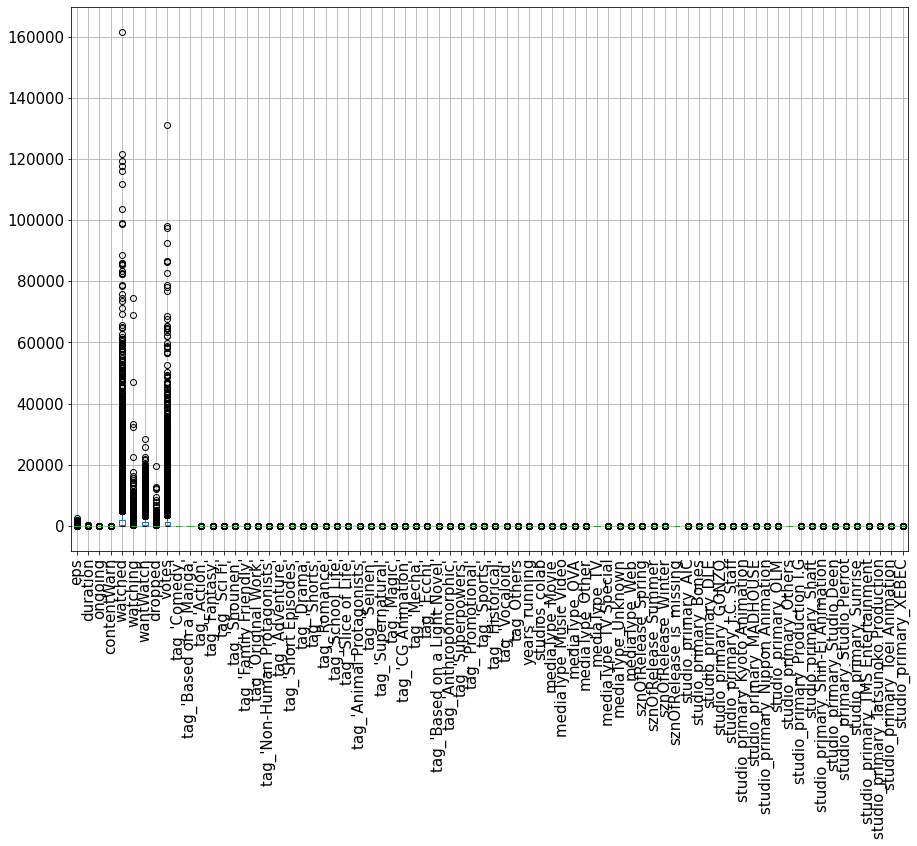

In [17]:
# sns.boxplot(data = x);
# plt.xticks(rotation =90);
x.boxplot(figsize = (15,10), fontsize = 15, rot = 90); #As can see here, it confirms also that there is dominance of one 
# variable over the other, hence, the need for scaling using a standard scaler here.  

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
x_train_sc = scaler.fit_transform(x_train)

In [21]:
x_test_sc = scaler.transform(x_test)

In [22]:
x_train_sc

array([[-0.17173808,  0.10278422, 11.09515949, ..., -0.11156342,
        -0.23436274, -0.09902508],
       [-0.18799954,  0.21286753, -0.09012939, ..., -0.11156342,
        -0.23436274, -0.09902508],
       [-0.20426099, -0.44763231, -0.09012939, ..., -0.11156342,
        -0.23436274, -0.09902508],
       ...,
       [-0.17173808, -0.66779893, -0.09012939, ..., -0.11156342,
        -0.23436274, -0.09902508],
       [-0.20426099, -0.59441005, -0.09012939, ..., -0.11156342,
        -0.23436274, -0.09902508],
       [ 0.18601389, -0.63110449, -0.09012939, ..., -0.11156342,
        -0.23436274, -0.09902508]])

### Build Linear Regression Model

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Recall that linear regression is a form of linear model  
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Normalise the data
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error

In [24]:
lin_reg = LinearRegression()

In [25]:
lin_reg.fit(x_train_sc, y_train)

LinearRegression()

#### Function to measure Model Performances
- Model performance check
- We will be using metric functions defined in sklearn for RMSE, MAE, and R2.

- We will define functions to calculate adjusted R2.

- The adjuted R2 penalizes the regression model for adding unimportant features.
- We will create a function that will print out all the above metrics in one go.

In [26]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

### Check Model Performance on Train set

In [27]:
model_train_perform = model_performance_regression(lin_reg, x_train_sc, y_train)

In [28]:
model_train_perform

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.566326,0.456311,0.535429,0.53185,17.910262


### Model Performance on Test set

In [29]:
model_train_perform = model_performance_regression(lin_reg, x_test_sc, y_test)

In [30]:
model_train_perform

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.573016,0.464757,0.503279,0.48761,18.015402


### Ridge Regression

In [31]:
# ridge = Ridge(alpha = 1)
ridge = Ridge()

In [32]:
ridge.fit(x_train_sc, y_train)

Ridge()

In [33]:
ridge.coef_
ridge.intercept_

2.950799173553719

In [34]:
print("Training performance:{:.3f}".format(ridge.score(x_train_sc, y_train)))
print("Testing performance:{:.3f}".format(ridge.score(x_test_sc, y_test)))

Training performance:0.535
Testing performance:0.503


In [35]:
pred = ridge.predict(x_train_sc)
pred_test = ridge.predict(x_test_sc)

In [36]:
r2_score(pred, y_train)

0.13196086718186772

### MODEL PERFORMANCE - TRAIN 

In [37]:
model_ridge_train_perform = model_performance_regression(ridge, x_train_sc, y_train)

In [38]:
model_ridge_train_perform

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.566327,0.456311,0.535426,0.531847,17.911134


### MODEL PERFORMANCE - TEST 

In [39]:
model_ridge_test_perform = model_performance_regression(ridge, x_test_sc, y_test)

In [40]:
model_ridge_test_perform

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.572993,0.464737,0.503318,0.487651,18.016023


### Lasso Regression

In [41]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [42]:
lasso = Lasso()

In [43]:
lasso.fit(x_train_sc, y_train) #Fit model 

Lasso()

In [44]:
#Model accuracy of training and testing sets 
lasso.score(x_train_sc, y_train) #LAsso was too harsh giving those sets values; an hyper parameter tunning can come in here  

0.0

### model performance test  and train 

In [45]:
model_Lasso_test_perform = model_performance_regression(lasso, x_test_sc, y_test)
model_Lasso_test_perform

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.813084,0.686483,-0.000117,-0.031664,27.404405


In [46]:
model_Lasso_train_perform = model_performance_regression(lasso, x_train_sc, y_train)
model_Lasso_train_perform

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.830884,0.699654,0.0,-0.007704,28.141689


### Forward Feature Selection Using SequentialFeatureSelector

In [47]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [48]:
#Here the featureSlection approach was explored where the important feature that likely contribute to the model is being used  
# import the SequentialFeatureSelector from the feature_selection module

from mlxtend.feature_selection import SequentialFeatureSelector

In [49]:
# create an instance of the linear model
lin_reg = LinearRegression()

# create an instance of the sequential feature selector
sfs = SequentialFeatureSelector (estimator = lin_reg, k_features =x_train.shape[1],  n_jobs = -1, verbose = 2)
#estimator is the linear model explored, by default forward selection is being true and being used, n_jobs = -1 is the nof of parallel 
#frmit shld use, verbose = 2 mean display the model execution  
#x_train.shape[1] or x_train_sc.shape[] can be used which gives the value no of the column indices  



# build the sequential feature selector

sfs.fit(x_train_sc, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  67 out of  74 | elapsed:    6.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    6.8s finished

[2023-02-15 20:10:22] Features: 1/74 -- score: 0.2789223999189745[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.6s finished

[2023-02-15 20:10:23] Features: 2/74 -- score: 0.34656017129702754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.7s finished

[2023-02-15 20:10:24] Features: 3/74 -- score: 0.39064930921007573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    0.7s finished

[2023-


[2023-02-15 20:11:18] Features: 34/74 -- score: 0.5199742708037715[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished

[2023-02-15 20:11:20] Features: 35/74 -- score: 0.5203809318860673[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.7s finished

[2023-02-15 20:11:22] Features: 36/74 -- score: 0.5207850626186369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    2.0s finished

[2023-02-15 20:11:25] Features: 37/74 -- score: 0.5210846600960759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.7s finished

[2023-02-15 20:11:26] Features: 38/74 -- score: 0.521335430595

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished

[2023-02-15 20:12:14] Features: 70/74 -- score: 0.5219578797747036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished

[2023-02-15 20:12:15] Features: 71/74 -- score: 0.521736697349382[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished

[2023-02-15 20:12:15] Features: 72/74 -- score: 0.5215740245527425[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2023-02-15 20:12:16] Features: 73/74 -- score: 0.5213238503941723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished

[2023-02-15 20:12:16] Features: 74/74 -- score: 0.5210785605422708

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(74, 74),
                          n_jobs=-1, scoring='r2', verbose=2)

### Plot the performce with addition of each feature

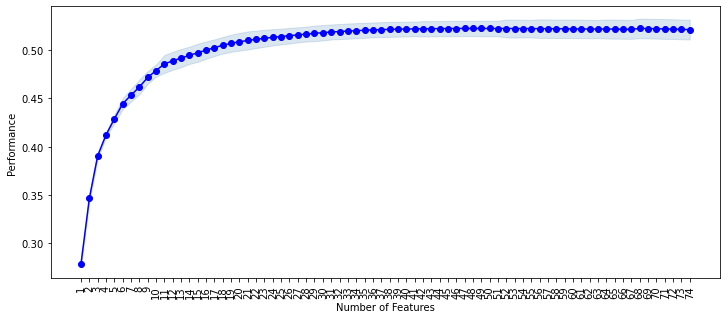

In [50]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize = (12, 5))
plt.xticks(rotation = 90)
plt.show()
# As can see here, from no of feature = 30, the performance remained constant, meaning about 30nos copnftributed to the performance of the model 
# Having gotten the performance merics values, can we remodel based on these k_features = 30 

#### Re-do the Sequential Feature Selection using required features

In [51]:
# create an instance of the linear model
lin_reg2 = LinearRegression()
#Since the required feature contributing positively to the model is actually 30, lets remodel based on this 30features  


# create an instance of the sequential feature selector

sfs = SequentialFeatureSelector(estimator = lin_reg2, n_jobs = -1, verbose = 2, k_features = 30)

# build the sequential feature selector
sfs = sfs.fit(x_train_sc, y_train )



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.6s finished

[2023-02-15 20:12:19] Features: 1/30 -- score: 0.2789223999189745[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.6s finished

[2023-02-15 20:12:20] Features: 2/30 -- score: 0.34656017129702754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.5s finished

[2023-02-15 20:12:20] Features: 3/30 -- score: 0.39064930921007573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    0.7s finished

[2023-02-15 20:12:21] Features: 4/30 -- score: 0.41219617078492626[Parallel(n_jobs=-1)]

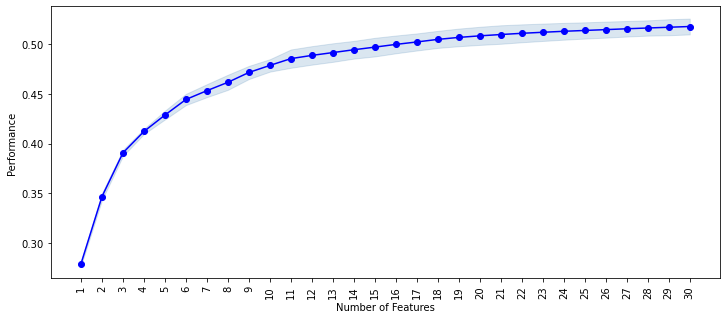

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize = (12, 5))  #sfs.get plots, if its variable is sfs2, u will use 
plt.xticks(rotation = 90)
plt.show()

In [53]:
x_train.shape[1]

74

### Select important features

In [54]:
# Now that we have done the feature selection, we can go further to carry oput modelling for better optimisation 
sfs.k_feature_idx_ #Theses are the 30features used for the modelling which is a tuple 

(1,
 2,
 3,
 6,
 7,
 10,
 12,
 14,
 15,
 16,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 31,
 32,
 35,
 37,
 42,
 43,
 44,
 56,
 58,
 63,
 64,
 69)

In [55]:
# Look at the most important features
x_train.columns

Index(['eps', 'duration', 'ongoing', 'contentWarn', 'watched', 'watching',
       'wantWatch', 'dropped', 'votes', 'tag_'Comedy'',
       'tag_'Based on a Manga'', 'tag_'Action'', 'tag_'Fantasy'',
       'tag_'Sci Fi'', 'tag_'Shounen'', 'tag_'Family Friendly'',
       'tag_'Original Work'', 'tag_'Non-Human Protagonists'',
       'tag_'Adventure'', 'tag_'Short Episodes'', 'tag_'Drama'',
       'tag_'Shorts'', 'tag_'Romance'', 'tag_'School Life'',
       'tag_'Slice of Life'', 'tag_'Animal Protagonists'', 'tag_'Seinen'',
       'tag_'Supernatural'', 'tag_'Magic'', 'tag_'CG Animation'',
       'tag_'Mecha'', 'tag_'Ecchi'', 'tag_'Based on a Light Novel'',
       'tag_'Anthropomorphic'', 'tag_'Superpowers'', 'tag_'Promotional'',
       'tag_'Sports'', 'tag_'Historical'', 'tag_'Vocaloid'', 'tag_Others',
       'years_running', 'studios_colab', 'mediaType_Movie',
       'mediaType_Music Video', 'mediaType_OVA', 'mediaType_Other',
       'mediaType_TV', 'mediaType_TV Special', 'mediaType_Unkno

In [56]:
feat_list_index = list(sfs.k_feature_idx_) #turn to a list  
feat_cols =   x_train.columns [feat_list_index] #Recall list indexing  
feat_cols

Index(['duration', 'ongoing', 'contentWarn', 'wantWatch', 'dropped',
       'tag_'Based on a Manga'', 'tag_'Fantasy'', 'tag_'Shounen'',
       'tag_'Family Friendly'', 'tag_'Original Work'', 'tag_'Short Episodes'',
       'tag_'Drama'', 'tag_'Shorts'', 'tag_'School Life'',
       'tag_'Slice of Life'', 'tag_'Animal Protagonists'', 'tag_'Seinen'',
       'tag_'Supernatural'', 'tag_'Ecchi'', 'tag_'Based on a Light Novel'',
       'tag_'Promotional'', 'tag_'Historical'', 'mediaType_Movie',
       'mediaType_Music Video', 'mediaType_OVA', 'studio_primary_DLE',
       'studio_primary_J.C. Staff', 'studio_primary_Others',
       'studio_primary_Production I.G', 'studio_primary_Sunrise'],
      dtype='object')

In [57]:
# select the important features in training and test sets



In [58]:
x_train_new = x_train [feat_cols]  #see X_train as df where u require dataframe based on lists of columns  
x_train_new

,duration,ongoing,contentWarn,wantWatch,dropped,tag_'Based on a Manga',tag_'Fantasy',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',...,tag_'Promotional',tag_'Historical',mediaType_Movie,mediaType_Music Video,mediaType_OVA,studio_primary_DLE,studio_primary_J.C. Staff,studio_primary_Others,studio_primary_Production I.G,studio_primary_Sunrise
772,23.0,True,0,3225,70,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4645,26.0,False,0,346,12,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9110,8.0,False,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5544,24.0,False,0,141,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1788,23.0,False,0,663,41,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,10.0,False,0,70,5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,52.0,False,0,472,9,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9845,2.0,False,0,252,7,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10799,4.0,False,0,28,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
x_test_new = x_test [feat_cols]
x_test_new 

,duration,ongoing,contentWarn,wantWatch,dropped,tag_'Based on a Manga',tag_'Fantasy',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',...,tag_'Promotional',tag_'Historical',mediaType_Movie,mediaType_Music Video,mediaType_OVA,studio_primary_DLE,studio_primary_J.C. Staff,studio_primary_Others,studio_primary_Production I.G,studio_primary_Sunrise
2470,26.0,False,0,1474,66,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5201,4.0,False,0,27,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,4.0,False,0,2403,123,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9244,2.0,False,0,580,34,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2916,111.0,False,0,1508,16,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,30.0,False,0,1121,164,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1813,5.0,False,0,617,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6733,5.0,False,0,397,90,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9686,1.0,False,0,47,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Re-build the Models with the new features

In [60]:
# In rebuilding the model, recall we now have a spliteed training and test sets but not scaled 

In [61]:
scaler_new = StandardScaler()

In [62]:
x_train_new_sc = scaler_new.fit_transform(x_train_new) #Only the train and test sets of the numerical values are being scaled 
x_test_new_sc = scaler_new.transform(x_test_new)

In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Recall that linear regression is a form of linear model  
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Normalise the data
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [64]:
lin_reg2= LinearRegression()
lin_reg2.fit(x_train_new_sc, y_train)

LinearRegression()

## Model performance on train and test 

In [65]:
model_Lasso_test_perform = model_performance_regression(lin_reg2, x_test_new_sc, y_test)
model_Lasso_test_perform

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.578618,0.468149,0.493518,0.48716,18.181158


## POLYNOMIAL FEATURE 

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
x.shape

(12101, 74)

In [68]:
poly =  PolynomialFeatures(degree = 2)
x_new = poly.fit_transform(x)

In [69]:
x_new.shape # As can see in the column nos, it has created enough data column so we have have eniugh datas and underfitting managed 

(12101, 2850)

In [70]:
x_train_new, x_test_new, y_train, y_test= train_test_split ( x_new,y,test_size = 0.2, random_state = 0 )